Problem Statement No. 03 <br>
Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the
species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset.
Calculate the measures of variability. Calculate and provide the visualization of the Correlation among the variables.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# M1: (statistical details like percentile, mean, standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset.)
grouped = df.groupby("Species")
grouped.describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

In [11]:
# M2:
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

print("Setosa:\n", setosa.describe())
print("\nVersicolor:\n", versicolor.describe())
print("\nVirginica:\n", virginica.describe())

Setosa:
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Versicolor:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.

In [10]:
num = df.select_dtypes(include=['int64', 'float64']).columns.drop('Id')
for col in num:
    print(f"For {col}")
    print(f"std. dev = {df[col].std()}")
    print(f"variance = {df[col].var()}")
    print("---------------------------------")

For SepalLengthCm
std. dev = 0.8280661279778629
variance = 0.6856935123042505
---------------------------------
For SepalWidthCm
std. dev = 0.4335943113621737
variance = 0.18800402684563763
---------------------------------
For PetalLengthCm
std. dev = 1.7644204199522617
variance = 3.1131794183445156
---------------------------------
For PetalWidthCm
std. dev = 0.7631607417008414
variance = 0.5824143176733784
---------------------------------


<Axes: >

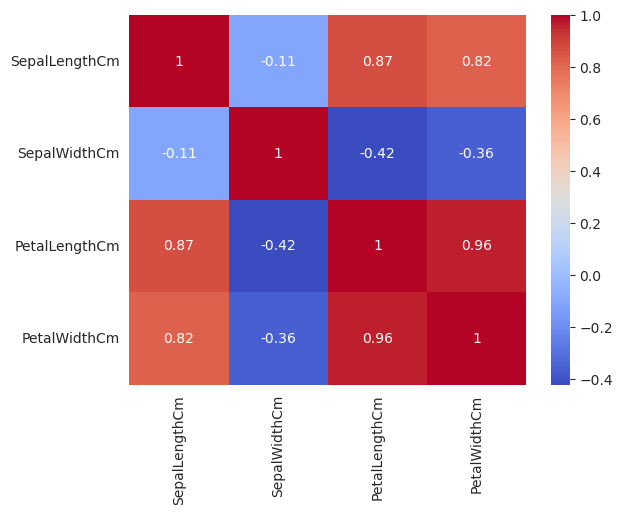

In [16]:
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm')